In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [3]:
#Loading the dataset
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Checking the summary of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Checking for Null values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that there is no **Null value** in our dataset.

In [6]:
# Making copy of the dataset
df = data.copy()

There are 3 categorical features : **"sex","smoker","region"** in our dataset. So we will encode these categorical features.

In [7]:
#Encoding the features
from sklearn.preprocessing import LabelEncoder
#smoker
labelencoder_smoker = LabelEncoder()
df.smoker = labelencoder_smoker.fit_transform(df.smoker)
#sex
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)
#region
labelencoder_region = LabelEncoder()
df.region = labelencoder_region.fit_transform(df.region)


After encoding our dataset looks like this.

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Finding the correlation between **charges** and  other features and arranging them in increasing order.

In [9]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

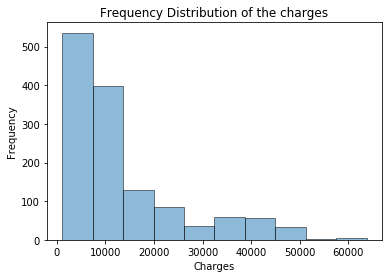

In [10]:
%matplotlib inline
plt.hist(df.charges,bins = 10,alpha=0.5,histtype='bar',ec='black')
plt.title("Frequency Distribution of the charges")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The above plot represents the ditribution of the medical charges which tells us
how many patients spend how much money on treatment on average.

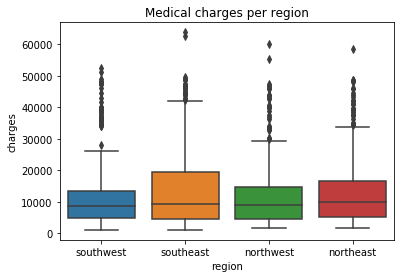

In [11]:
sns.boxplot(x=data.region,y=data.charges,data=data)
plt.title("Medical charges per region")
plt.show()

The above boxplot shows money spent by people on their** treatment** in different **regions**. From the plot we can say that the region doesn't have much impact on medical charges.

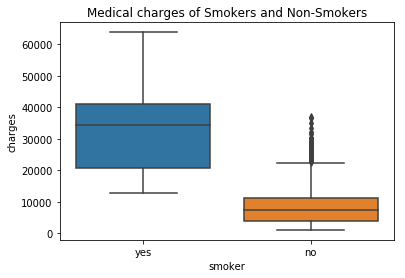

In [12]:
sns.boxplot(x=data.smoker,y=data.charges,data=data)
plt.title("Medical charges of Smokers and Non-Smokers")
plt.show()

The boxplot between the **medical charges** of **smokers** and **non-smokers** conveys that those who smoke spend around 4 times more on medicines or treatment as comparerd to those who don't smoke.

C:\Users\Saurabh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Saurabh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


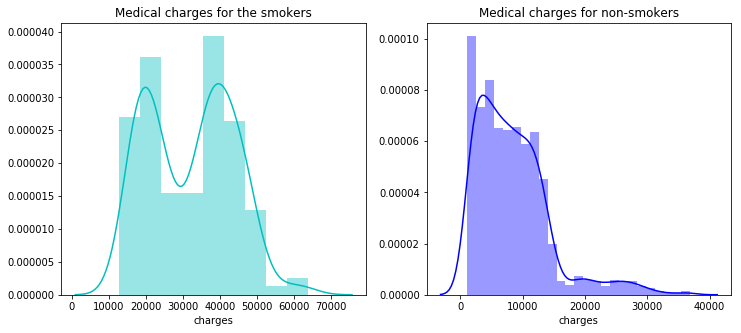

In [13]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.distplot(df[df.smoker==1]['charges'],color='c',ax=ax)
ax.set_title('Medical charges for the smokers')

ax = f.add_subplot(122)
sns.distplot(df[df.smoker==0]['charges'],color='b',ax=ax)
ax.set_title('Medical charges for non-smokers')
plt.show()

These plots represents the distribution of **medical charges** for the **smokers** and **non-smokers**.

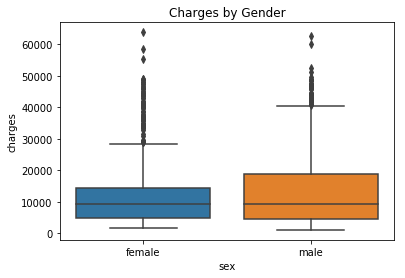

In [14]:
sns.boxplot(x=data.sex,y=data.charges,data=data)
plt.title("Charges by Gender")
plt.show()

The boxplot between **sex** and **charges** shows that there is no **gender biasing** with the medical charges . It doesn't matter whether you are a male or a female the charges remains same for all.

C:\Users\Saurabh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Saurabh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


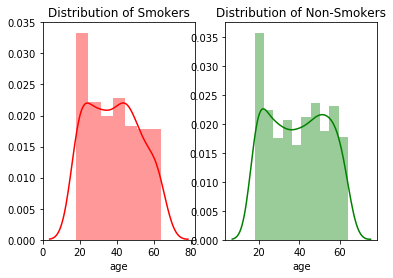

In [15]:
plt.subplot(1,2,1)
sns.distplot(df[df.smoker==1]['age'],color='red')
plt.title("Distribution of Smokers")

plt.subplot(1,2,2)
sns.distplot(df[df.smoker==0]['age'],color='green')
plt.title("Distribution of Non-Smokers")
plt.show()

These plots represents the distribution of **smokers** and **non-smokers** with in accordance with their **age**.

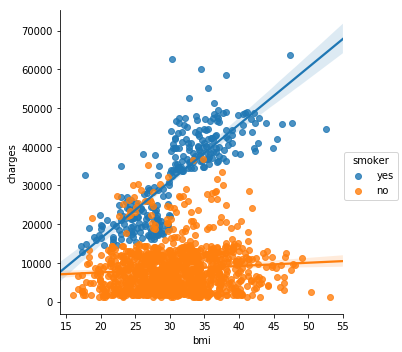

In [17]:
sns.lmplot(x="bmi",y='charges',hue='smoker',data=data)
plt.show()

Medical charge increases in case of **smoker** with the increasing **bmi**. But in case of **non-smokers** the increase in **bmi** doesn't have large impact on the medical charges.

**Visualizing the regression model **

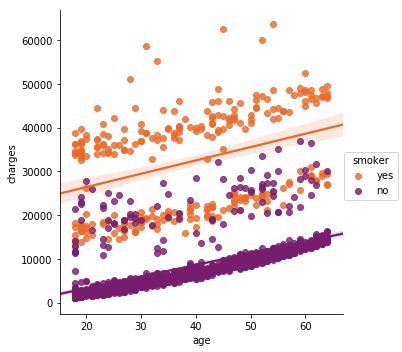

In [18]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data,palette='inferno_r')
plt.show()

In the case of non-smokers, the cost of treatment increases with age, while in case of the  smokers, there is not do such dependence. We can also see that age has positive correlation and has larger affect after the smoker that leads to increase in the charges. And it is also a common phenomenon that with increasing age medical expenses will increase whether you are a smokeror not.

Now we will predict the cost of treatment on the basis of the given features.
We will start with **regression** , in the beginning we are considering **all the features**.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Considering all the features

X = df.iloc[:,:6].values
Y = df.iloc[:,6].values

#Splitting the dataset into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

# Training
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print(regressor.score(X_test,Y_test))


0.7534205943894733


In the second model we are using **regression** but not considering **region** due to its **negative correlation** with medical** charges**.

In [20]:
#Not considering region
X1 = df.iloc[:,[0,1,2,3,4]].values
Y1 = df.iloc[:,6].values

X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.25)

#Training
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print(regressor.score(X_test,Y_test))

0.7918627452652196


Now, we will check the result using **Polynomial regression**.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg  = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.25)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,Y_train)

print(lin_reg.score(X_test,Y_test))

0.8750986866148265


This is a good result as compared to the previous models.


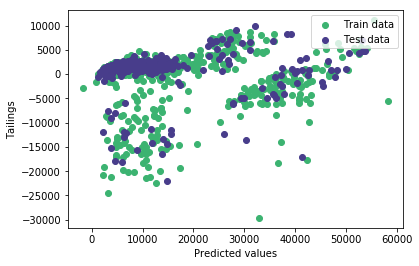

In [22]:
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

plt.scatter(pred_train,pred_train - Y_train,label='Train data',color='mediumseagreen')
plt.scatter(pred_test,pred_test-Y_test,label="Test data",color='darkslateblue')
plt.legend(loc = 'upper right')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.show()

Our model is able to predict good results for the medical charges of the people.
